<a href="https://colab.research.google.com/github/wedexyz/eeg-/blob/main/MLVS4_8chanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fftshift
import numpy as np

import os
import random
import time
import os
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import multilabel_confusion_matrix
import time

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [251]:




idle = np.load("/content/drive/MyDrive/Colab Notebooks/data8/idle/1608706768.npy")
kanan = np.load("/content/drive/MyDrive/Colab Notebooks/data8/kanan/1608707012.npy")
kiri = np.load("/content/drive/MyDrive/Colab Notebooks/data8/kiri/1608707050.npy")
maju = np.load("/content/drive/MyDrive/Colab Notebooks/data8/maju/1608706976.npy")

kelas1=idle[0][16]
kelas2=maju[0][16]
kelas3=kanan[0][16]
kelas4=kiri[0][16]

kelas1a=idle[175]
kelas2a=maju[175]
kelas3a=kanan[175]
kelas4a=kiri[175]

#print(idlea.shape)



f1, t1,Sxx= signal.spectrogram(kelas1,fs=60, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd',
                            )
dbs1 = 10*np.log10(Sxx)
f2, t2,Sxx= signal.spectrogram(kelas2,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd',
                            )
dbs2 = 10*np.log10(Sxx)
f3, t3,Sxx= signal.spectrogram(kelas3,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd'
                            )
dbs3 = 10*np.log10(Sxx)
f4, t4,Sxx= signal.spectrogram(kelas4,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd'
                            )  
dbs4 = 10*np.log10(Sxx)

cwt1 = signal.cwt(kelas1,signal.ricker,widths=np.arange(1,50))
cwt2 = signal.cwt(kelas2,signal.ricker,widths=np.arange(1,50))
cwt3 = signal.cwt(kelas3,signal.ricker,widths=np.arange(1,50))
cwt4 = signal.cwt(kelas4,signal.ricker,widths=np.arange(1,50))




# Data

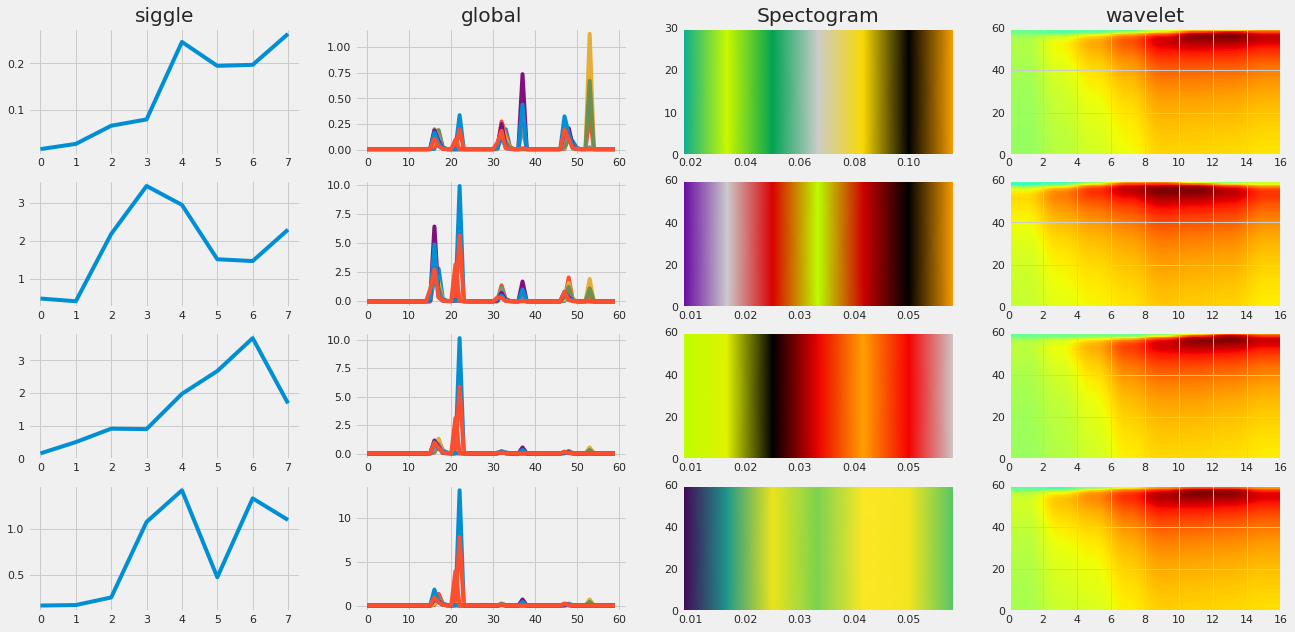

In [252]:

fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(20,10))
axs = axs.flatten()

axs[0].set_title("siggle")
axs[0].plot(kelas1)

axs[1].set_title("global")
axs[1].plot(kelas1a)

axs[2].set_title("Spectogram")
axs[2].pcolormesh(t1, f1,dbs1,  
                  shading='gouraud',
                  cmap='nipy_spectral')


axs[3].set_title("wavelet")
axs[3].imshow(cwt1,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt1).max(),vmin=-abs(cwt1).max())

axs[4].plot(kelas2)
axs[5].plot(kelas2a)
axs[6].pcolormesh(t2, f2,dbs2,  
                  shading='gouraud',
                  cmap='nipy_spectral')
axs[7].imshow(cwt2,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt2).max(),vmin=-abs(cwt2).max())

axs[8].plot(kelas3)
axs[9].plot(kelas3a)
axs[10].pcolormesh(t3, f3,dbs3,  
                  shading='gouraud',
                  cmap='nipy_spectral')
axs[11].imshow(cwt3,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt3).max(),vmin=-abs(cwt3).max())

axs[12].plot(kelas4)
axs[13].plot(kelas4a)
axs[14].pcolormesh(t4, f4,dbs4,  
                  shading='gouraud',
                  cmap='viridis')
axs[15].imshow(cwt4,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt4).max(),vmin=-abs(cwt4).max())
plt.show()


In [253]:
def create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/data8"):
    training_data = {}
    for action in ACTIONS:
        if action not in training_data:
            training_data[action] = []
        data_dir = os.path.join(starting_dir,action)
        for item in os.listdir(data_dir):
            data = np.load(os.path.join(data_dir, item))
            for item in data:
                training_data[action].append(item)

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)

    for action in ACTIONS:
        np.random.shuffle(training_data[action])  
        training_data[action] = training_data[action][:min(lengths)]

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)
    combined_data = []
    for action in ACTIONS:
        for data in training_data[action]:
            if action == "kiri":
                combined_data.append([data, [1, 0, 0,0]])
            elif action == "maju":
                combined_data.append([data, [0, 1, 0, 0]])
            elif action == "idle":
                combined_data.append([data, [0, 0, 1, 0]])
            elif action == "kanan":
                combined_data.append([data, [0, 0, 0, 1]])

    np.random.shuffle(combined_data)
    print("length:",len(combined_data))
    return combined_data


In [254]:
ACTIONS = ["kiri", "maju","idle","kanan"]
#reshape = (-1,16, 60,1)
reshape = (-1,8, 60)

#reshape(-1,28,28,1)




In [255]:
print("creating training data")
traindata = create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/data8")
train_X = []
train_y = []

for X, y in traindata:
    train_X.append(X)
    train_y.append(y)



train_X = np.array(train_X).reshape(reshape)
train_y = np.array(train_y)

x_train,x_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.2,random_state = np.random.randint(1,1000, 1)[0] )
x_train = np.asarray(x_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]


creating training data
[250, 250, 250, 250]
[250, 250, 250, 250]
length: 1000
(800, 8, 60)
(200, 8, 60)
(800, 4)
(200, 4)


In [256]:
sgd = SGDClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
ld = LinearDiscriminantAnalysis()
sv = SVC()
ada= AdaBoostClassifier()
kn = KNeighborsClassifier()
GU = GaussianNB()


clf1 =OneVsRestClassifier(sgd)
clf2 =OneVsRestClassifier(lr)
clf3 =OneVsRestClassifier(rf)
clf4 =OneVsRestClassifier(ld)
clf5 =OneVsRestClassifier(sv)  
clf6 =OneVsRestClassifier(ada) 
clf7 =OneVsRestClassifier(kn) 
clf8 =OneVsRestClassifier(GU) 

start=time.time()

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)
clf5.fit(x_train,y_train)
clf6.fit(x_train,y_train)
clf7.fit(x_train,y_train)
clf8.fit(x_train,y_train)



predictions1 = clf1.predict(x_test)
predictions2 = clf2.predict(x_test)
predictions3 = clf3.predict(x_test)
predictions4 = clf4.predict(x_test)
predictions5 = clf5.predict(x_test)
predictions6 = clf6.predict(x_test)
predictions7 = clf7.predict(x_test)
predictions8 = clf8.predict(x_test)

# accuracy
print("-------------------------")
print( "SGD")
print("Accuracy = ",accuracy_score(y_test,predictions1))
print("Hamming Loss = ",hamming_loss(y_test,predictions1))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions1))

# accuracy
print("-------------------------")
print( "LR")
print("Accuracy = ",accuracy_score(y_test,predictions2))
print("Hamming Loss = ",hamming_loss(y_test,predictions2))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions2))

# accuracy
print("-------------------------")
print( "RF")
print("Accuracy = ",accuracy_score(y_test,predictions3))
print("Hamming Loss = ",hamming_loss(y_test,predictions3))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions3))

# accuracy
print("-------------------------")
print( "LD")
print("Accuracy = ",accuracy_score(y_test,predictions4))
print("Hamming Loss = ",hamming_loss(y_test,predictions4))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions4))

# accuracy
print("-------------------------")
print( "SV")
print("Accuracy = ",accuracy_score(y_test,predictions5))
print("Hamming Loss = ",hamming_loss(y_test,predictions5))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions5))

# accuracy
print("-------------------------")
print( "AD")
print("Accuracy = ",accuracy_score(y_test,predictions6))
print("Hamming Loss = ",hamming_loss(y_test,predictions6))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions6))
# accuracy
print("-------------------------")
print( "KN")
print("Accuracy = ",accuracy_score(y_test,predictions7))
print("Hamming Loss = ",hamming_loss(y_test,predictions7))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions7))
# accuracy
print("-------------------------")
print( "GU")
print("Accuracy = ",accuracy_score(y_test,predictions8))
print("Hamming Loss = ",hamming_loss(y_test,predictions8))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_test,predictions8))

print('training time taken: ',round(time.time()-start,0),'seconds')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-------------------------
SGD
Accuracy =  0.545
Hamming Loss =  0.1325
label_ranking_average_precision_score 0.7241666666666667
-------------------------
LR
Accuracy =  0.775
Hamming Loss =  0.05875
label_ranking_average_precision_score 0.84875
-------------------------
RF
Accuracy =  0.9
Hamming Loss =  0.025
label_ranking_average_precision_score 0.92625
-------------------------
LD
Accuracy =  0.52
Hamming Loss =  0.195
label_ranking_average_precision_score 0.69
-------------------------
SV
Accuracy =  0.505
Hamming Loss =  0.125
label_ranking_average_precision_score 0.62875
-------------------------
AD
Accuracy =  0.78
Hamming Loss =  0.06
label_ranking_average_precision_score 0.84625
-------------------------
KN
Accuracy =  0.925
Hamming Loss =  0.0325
label_ranking_average_precision_score 0.94375
-------------------------
GU
Accuracy =  0.22
Hamming Loss =  0.30875
label_ranking_average_precision_score 0.5312499999999997
training time taken:  10.0 seconds


#Perbandingan

['SGD', 'LR', 'RF', 'LDA', 'SVM', 'AD', 'KNN', 'GU']
[0.545, 0.775, 0.9, 0.52, 0.505, 0.78, 0.925, 0.22]


<BarContainer object of 8 artists>

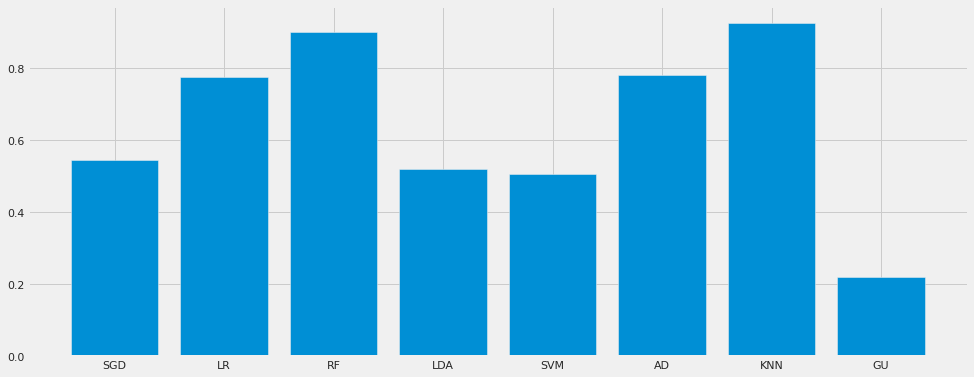

In [257]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data = {'SGD': accuracy_score(y_test,predictions1), 'LR': accuracy_score(y_test,predictions2), 
        'RF': accuracy_score(y_test,predictions3), 'LDA': accuracy_score(y_test,predictions4),
        'SVM': accuracy_score(y_test,predictions5),'AD': accuracy_score(y_test,predictions6),
        'KNN': accuracy_score(y_test,predictions7),'GU': accuracy_score(y_test,predictions8),}
names = list(data.keys())
values = list(data.values())
print(names)
print(values)
plt.figure(figsize=(15, 6))
plt.bar(names,values)



#RF +CONF

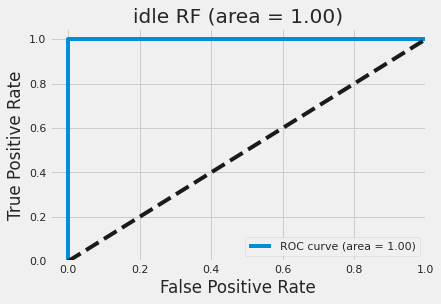

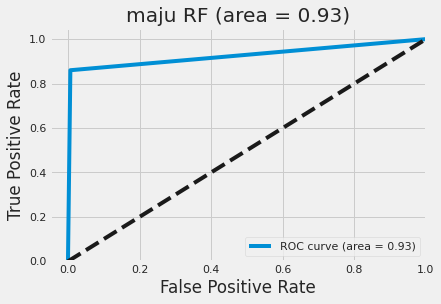

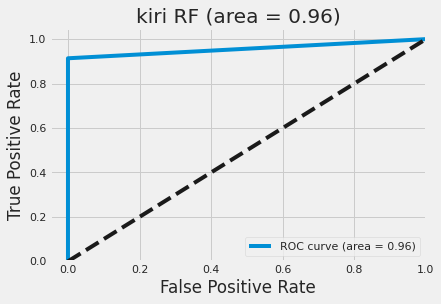

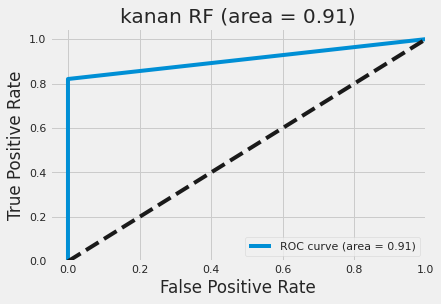

In [258]:
from sklearn.metrics import roc_curve, auc
y_score = clf3.predict(x_test)
#y_score = clf.predict(xval)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
ACTIONS =  ["idle","maju","kiri", "kanan"]
# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    plt.title('%s RF (area = %0.2f)' % (ACTIONS[i],roc_auc[i]))
    plt.legend(loc="lower right")
    plt.show()

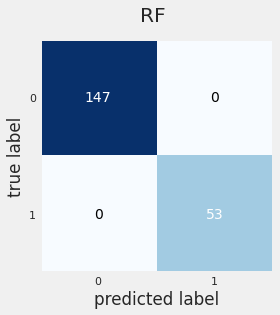

In [259]:
from sklearn.metrics import multilabel_confusion_matrix
cm=multilabel_confusion_matrix(y_test, predictions3)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm[0])
plt.title('RF ' )
plt.show()

# KKN ROC + MAP

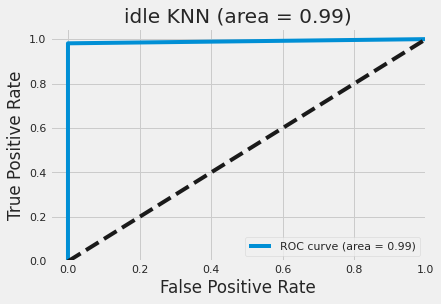

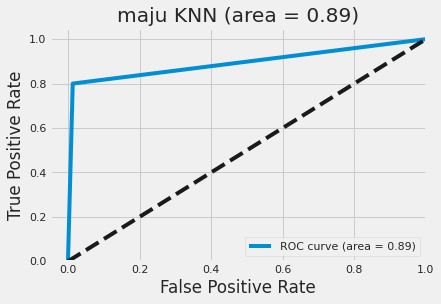

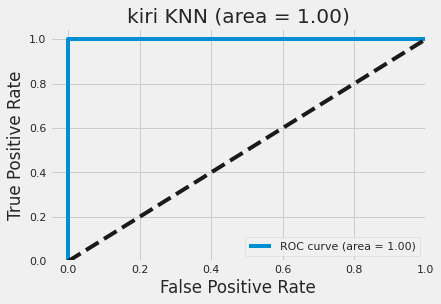

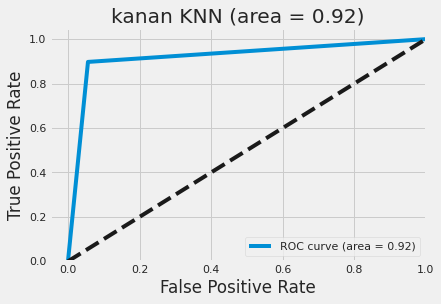

In [260]:
from sklearn.metrics import roc_curve, auc
y_score = clf7.predict(x_test)
#y_score = clf.predict(xval)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
ACTIONS =  ["idle","maju","kiri", "kanan"]
# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    plt.title('%s KNN (area = %0.2f)' % (ACTIONS[i],roc_auc[i]))
    plt.legend(loc="lower right")
    plt.show()

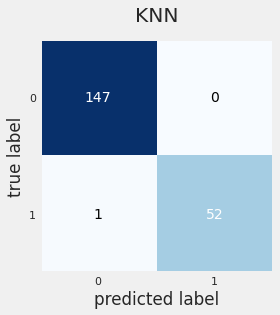

In [261]:
from sklearn.metrics import multilabel_confusion_matrix
cm=multilabel_confusion_matrix(y_test, predictions7)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm[0])
plt.title('KNN' )
plt.show()